In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
!ls ../input

# Any results you write to the current directory are saved as output.

sample_submission.csv  test  train  train.csv


In [6]:
# Pipe output to do basic analysis
!ls ../input/train/ | wc -l
!ls ../input/train/ | head

124288
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_blue.png
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_green.png
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_red.png
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_yellow.png
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_blue.png
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_green.png
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_red.png
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_yellow.png
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0_blue.png
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0_green.png
ls: write error: Broken pipe


In [7]:
!ls ../input/train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_*.png

../input/train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_blue.png
../input/train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_green.png
../input/train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_red.png
../input/train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_yellow.png


In [9]:
# Better approach: pathlib
from pathlib import Path

DATA_DIR = Path('../input')
TRAIN_DIR = DATA_DIR/'train'
TEST_DIR = DATA_DIR/'test'

In [11]:
# Power of Python
test_ids =list(set([str(fn).split('/')[-1].split('_')[0] for fn in TEST_DIR.iterdir()]))
print('Test IDs :' ,len(test_ids))
test_ids[:10]

Test IDs : 11702


['fa4ed666-bad4-11e8-b2b8-ac1f6b6435d0',
 'ba4e9b72-bad5-11e8-b2b9-ac1f6b6435d0',
 'd724f802-bacd-11e8-b2b8-ac1f6b6435d0',
 'bc43a69a-bac9-11e8-b2b8-ac1f6b6435d0',
 '818fc3fc-bad4-11e8-b2b8-ac1f6b6435d0',
 '0fad8574-bad1-11e8-b2b8-ac1f6b6435d0',
 'd0dcf3a0-bacd-11e8-b2b8-ac1f6b6435d0',
 'e37dfc34-bacd-11e8-b2b8-ac1f6b6435d0',
 'c510b9b4-bad0-11e8-b2b8-ac1f6b6435d0',
 '12d96a92-badb-11e8-b2b9-ac1f6b6435d0']

In [13]:
SUB_DIR = Path('files/submissions')
SUB_DIR.mkdir(parents=True, exist_ok=True)
!ls files

submissions


## Work with CSV files

In [14]:
# always use shell commands
LABELS_CSV = DATA_DIR/'train.csv'
!head {LABELS_CSV}

Id,Target
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18
001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0,0
0020af02-bbba-11e8-b2ba-ac1f6b6435d0,25 2
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0,0
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0,2 0


In [15]:
# pandas
import pandas as pd

train_df = pd.read_csv(LABELS_CSV, index_col='Id')
train_df.head(10)

Target
Id                                           
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1
001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18
001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0        0
0020af02-bbba-11e8-b2ba-ac1f6b6435d0     25 2
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0        0
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0      2 0
002daad6-bbc9-11e8-b2bc-ac1f6b6435d0        7

In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31072 entries, 00070df0-bbc3-11e8-b2bc-ac1f6b6435d0 to fffe0ffe-bbc0-11e8-b2bb-ac1f6b6435d0
Data columns (total 1 columns):
Target    31072 non-null object
dtypes: object(1)
memory usage: 485.5+ KB


In [16]:
# Use Python to your advantage
train_df['Target'] = train_df['Target'].str.split(' ').map(lambda x: list(map(int,x)))
train_df.head(10)

Target
Id                                                
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0       [16, 0]
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  [7, 1, 2, 0]
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0           [5]
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0           [1]
001838f8-bbca-11e8-b2bc-ac1f6b6435d0          [18]
001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0           [0]
0020af02-bbba-11e8-b2ba-ac1f6b6435d0       [25, 2]
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0           [0]
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0        [2, 0]
002daad6-bbc9-11e8-b2bc-ac1f6b6435d0           [7]

## 3. How to do Exploratory Data Analysis (EDA)

Pandas dataframe is a great statring point for doing EDA. It porvides many utileities for plotting graphs right out of the box.


In [22]:
label_names = ["Nucleoplasm", "Nuclear menbrane", "Nucleoli","Nucleoli fibrillar center", "Nuclear speckles",
               "Nuclear bodies", "Endoplasmic reticulum", "Golgi apparatus","Peroxisomes","endosomes","Lysosomes",
               "Intermediate filaments", "Actin filaments","Focal adhesion sites", "Microtubules","Microtubules ends",
               "Cytokinetic bridge","Mitotic spindle","Mocrotubule organizing center", "Centrosome", "Lipid droplets",
               "Plasma membrane","Cell junctions", "Mitochondria","Aggresome","Cytosol","Cytoplasmic bodies","Rods & rings"]


In [27]:
import numpy as np

def get_label_freqs(targets, label_names, ascending=None):
    n_classes = len(label_names)
    freqs = np.array([0] * n_classes)
    for lst in targets:
        for c in range(n_classes):
            freqs[c] += c in lst
    data = {
        'name':label_names,
        'frequency': freqs,
        'percent': (10000 * freqs /len(targets)).astype(int) / 100.,
    }
    cols = ['name','frequency','percent']
    df = pd.DataFrame(data, columns=cols)
    if ascending is not None:
        df = df.sort_values(by='frequency', ascending=ascending)
    return df

In [28]:
# create a frequency table
train_freqs = get_label_freqs(train_df.Target, label_names, ascending=False)
train_freqs

name  frequency  percent
0                     Nucleoplasm      12885    41.46
25                        Cytosol       8228    26.48
21                Plasma membrane       3777    12.15
2                        Nucleoli       3621    11.65
23                   Mitochondria       2965     9.54
7                 Golgi apparatus       2822     9.08
5                  Nuclear bodies       2513     8.08
4                Nuclear speckles       1858     5.97
3       Nucleoli fibrillar center       1561     5.02
19                     Centrosome       1482     4.76
1                Nuclear menbrane       1254     4.03
11         Intermediate filaments       1093     3.51
14                   Microtubules       1066     3.43
6           Endoplasmic reticulum       1008     3.24
18  Mocrotubule organizing center        902     2.90
22                 Cell junctions        802     2.58
12                Actin filaments        688     2.21
13           Focal adhesion sites        537     1.72
16             Cytokinetic bridge        530     1.70
26             Cytoplasmic bodies        328     1.05
24                      Aggresome        322     1.03
17                Mitotic spindle        210     0.67
20                 Lipid droplets        172     0.55
8                     Peroxisomes         53     0.17
9                       endosomes         45     0.14
10                      Lysosomes         28     0.09
15              Microtubules ends         21     0.06
27                   Rods & rings         11     0.03

Clearly there is a huge imbalance between the classes. and 15 of the 28 classes have less than 900 samples (3% of the data) and 9 classes have fewer than 330 samples (1% of the data). Any model which always predicts 0 or 'not present' for these calsses is already 97% accurate.

So. it's going to be really difficult to train a model that can detect the less frequently occuring classes. This may lead to a recall fo 0, which will lead to and F1 score 0 for these classes , thus putting a ceiling of 0.465 on the evaluation metric. In fact, we mihth need to train a separate model for these classes.

In [30]:
# visualize the frequency table using a chart
train_freqs.plot(x='name', y='frequency', kind='bar', title='Name vs. Frequency')

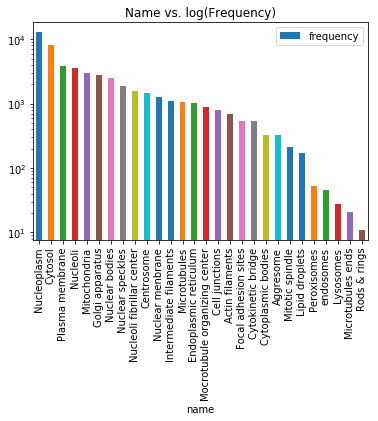

In [31]:
# Use logarithmic axis for easier interpretation
train_freqs.plot(x='name', y='frequency',kind='bar', logy=True, title='Name vs. log(Frequency)')

# How to display an image or show multibe images in a grid


In [32]:
train_sample = "ac39847a-bbb1-11e8-b2ba-ac1f6b6435d0_red.png"

In [33]:
from imageio import imread
import matplotlib.pyplot as plt

In [34]:
# Look at one chaneel/filter
img0 = imread(str(TRAIN_DIR/train_sample))
print(img0.shape)
plt.imshow(img0)
plt.title(train_sample[0]);

(512, 512)


In [35]:
# use a color map for grayscale images
plt.imshow(img0, cmap="Reds")

In [36]:
!ls {TRAIN_DIR}/ac39847a-bbb1-11e8-b2ba-ac1f6b6435d0_*.png

../input/train/ac39847a-bbb1-11e8-b2ba-ac1f6b6435d0_blue.png
../input/train/ac39847a-bbb1-11e8-b2ba-ac1f6b6435d0_green.png
../input/train/ac39847a-bbb1-11e8-b2ba-ac1f6b6435d0_red.png
../input/train/ac39847a-bbb1-11e8-b2ba-ac1f6b6435d0_yellow.png


In [37]:
CHANNELS=['green','red','blue','yellow']

In [39]:
#Load images for multiple cannels
def load_image(image_id, channels=CHANNELS, img_dir=TRAIN_DIR):
    image = np.zeros(shape=(len(channels),512,512))
    for i, ch in enumerate(channels):
        image[i,:,:] = imread(str(img_dir/f'{image_id}_{ch}.png'))
    return image

In [40]:
# Plot multiple images in a grid
def show_image_filters(image, title, figsize=(16,5)):
    fig, subax = plt.subplots(1,4,figsize=figsize)
    # Green channel
    subax[0].imshow(image[0], cmap='Greens')
    subax[0].set_title(title)
    # red channel
    subax[1].imshow(image[1], cmap="Reds")
    subax[1].set_title("Microtubules")
    # Blue channel
    subax[2].imshow(image[2], cmap="Blues")
    subax[2].set_title("Nucleus")
    # Orange channel
    subax[3].imshow(image[3], cmap="Oranges")
    subax[3].set_title("Endoplasmatic reticulum")
    return subax

In [41]:
# use the training data toshow appropriate labels
def get_labels(image_id):
    labels = [label_names[x] for x in train_df.loc[image_id]['Target']]
    return ', '.join(labels)

In [42]:
# Look at a sample grid
img_id = 'ac39847a-bbb1-11e8-b2ba-ac1f6b6435d0'
img, title = load_image(img_id), get_labels(img_id)
show_image_filters(img, title);
print(img.shape)

(4, 512, 512)


7c4ccf9e-bbb9-11e8-b2ba-ac1f6b6435d0
66b411b6-bbbd-11e8-b2ba-ac1f6b6435d0
3529ae1e-bbca-11e8-b2bc-ac1f6b6435d0


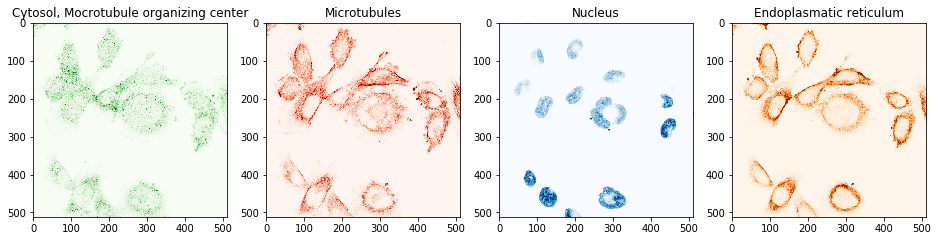

In [43]:
# combime with pandas to view a random sample
for img_id in train_df.sample(3).index:
    print(img_id)
    img, title = load_image(img_id), get_labels(img_id)
    show_image_filters(img, title)

|# How to generate a submission file


In [44]:
#let's define a sophisticated and highly accrate model
def model(inputs):
    return np.random.randn(len(inputs), len(label_names))

In [45]:
# Generate some predictions
preds = model(test_ids)
print(preds.shape)
print(preds)

(11702, 28)
[[-0.80897169 -0.36577564 -0.75991903 ...  0.27400462 -0.46754737
   0.3990078 ]
 [ 0.85374756  1.23889983 -0.1347648  ...  1.56722317  0.54072836
   1.18891947]
 [-0.03289309  0.09051588  0.65650631 ...  0.68719471 -0.01668449
  -1.32088608]
 ...
 [ 1.0799241  -2.13474859  1.19337068 ...  0.79993394  0.78683858
   2.01229181]
 [ 1.10183586 -1.55935371  0.15549616 ...  1.43784943  1.76881687
   0.54859657]
 [-2.23548259 -0.01692055 -0.46404951 ... -1.09579835 -1.08526771
  -0.45631624]]


In [47]:
# Convet them into probabilities
def sigmoid(x):
    return np.reciprocal(np.exp(-x)+1)
probs =sigmoid(preds)
probs

array([[0.30810967, 0.40956217, 0.31866384, ..., 0.56807577, 0.38519691,
        0.59844925],
       [0.70135269, 0.77537246, 0.4663597 , ..., 0.82738739, 0.63198184,
        0.76654776],
       [0.49177747, 0.52261353, 0.65847514, ..., 0.66534259, 0.49582897,
        0.21067091],
       ...,
       [0.74647962, 0.10576503, 0.76734337, ..., 0.68996035, 0.68715211,
        0.88208161],
       [0.75060393, 0.17373941, 0.5387959 , ..., 0.8081214 , 0.85431048,
        0.63380992],
       [0.09660908, 0.49576996, 0.38602561, ..., 0.25052798, 0.25251045,
        0.38786008]])

In [52]:
# Convert probabilities into labels
def make_labels(y, thres=0.75):
    return ' '.join([str(i) for i, p in enumerate(y) if p > thres])
make_labels(probs[0])

'12 16 20'

In [55]:
# Create a pandas dataframe
labels =list(map(make_labels, probs))
sub_df = pd.DataFrame({'Id':test_ids, 'Predicted': labels}, columns=['Id','Predicted'])
sub_df.head(10)

Id         Predicted
0  fa4ed666-bad4-11e8-b2b8-ac1f6b6435d0          12 16 20
1  ba4e9b72-bad5-11e8-b2b9-ac1f6b6435d0      1 3 18 25 27
2  d724f802-bacd-11e8-b2b8-ac1f6b6435d0             11 15
3  bc43a69a-bac9-11e8-b2b8-ac1f6b6435d0            2 3 21
4  818fc3fc-bad4-11e8-b2b8-ac1f6b6435d0  8 10 12 13 14 26
5  0fad8574-bad1-11e8-b2b8-ac1f6b6435d0             10 22
6  d0dcf3a0-bacd-11e8-b2b8-ac1f6b6435d0           8 18 25
7  e37dfc34-bacd-11e8-b2b8-ac1f6b6435d0   5 9 13 15 23 27
8  c510b9b4-bad0-11e8-b2b8-ac1f6b6435d0          10 17 23
9  12d96a92-badb-11e8-b2b9-ac1f6b6435d0         6 9 12 14

In [57]:
# Export it to a file and make sure it looks okay
sub_fname = SUB_DIR/'basic.csv'
sub_df.to_csv(sub_fname, index=None)

!head {sub_fname}

Id,Predicted
fa4ed666-bad4-11e8-b2b8-ac1f6b6435d0,12 16 20
ba4e9b72-bad5-11e8-b2b9-ac1f6b6435d0,1 3 18 25 27
d724f802-bacd-11e8-b2b8-ac1f6b6435d0,11 15
bc43a69a-bac9-11e8-b2b8-ac1f6b6435d0,2 3 21
818fc3fc-bad4-11e8-b2b8-ac1f6b6435d0,8 10 12 13 14 26
0fad8574-bad1-11e8-b2b8-ac1f6b6435d0,10 22
d0dcf3a0-bacd-11e8-b2b8-ac1f6b6435d0,8 18 25
e37dfc34-bacd-11e8-b2b8-ac1f6b6435d0,5 9 13 15 23 27
c510b9b4-bad0-11e8-b2b8-ac1f6b6435d0,10 17 23


In [58]:
# use fileling to downoload the file
from IPython.display import FileLink

FileLink(sub_fname)

/kaggle/working/files/submissions/basic.csv

# the last but mostimportant step is to take all of the above code(once it works a expexted)and wrap it into a function (or two)

In [60]:
def make_sub(fname):
    preds = model(test_ids)
    probs = sigmoid(preds)
    labels = list(map(make_labels, probs))
    sub_df = pd.DataFrame({'Id': test_ids, 'Predicted':labels}, columns=['Id','Predictes'])
    sub_df.to_csv(sub_fname, index=None)
    fpath = SUB_DIR/fname
    sub_df.to_csv(fpath, index=None)
    !head{fpath}
    return FileLink(fpath)

In [61]:
make_sub('best_submission.csv')

/bin/sh: 1: headfiles/submissions/best_submission.csv: not found


/kaggle/working/files/submissions/best_submission.csv

In [ ]:
# Now you can generate test predictions with a single line of code